In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick


Generating PCN proportion map with yellow-to-red gradient...

Countries being plotted: 31
Sample of countries being visualized:
                    Country  High_PCN_Proportion  Total_Plasmids
0  United States of America             0.214699            5701
1                     China             0.157350            5510
2                    Taiwan             0.185847            2911
3               South Korea             0.152460            1443
4                     Spain             0.274298            1389
Saved: /mnt/c/Clinical_isolates/Fig_4a.pdf
Saved: /mnt/c/Clinical_isolates/Fig_4a.svg
Saved: /mnt/c/Clinical_isolates/Fig_4a.tiff


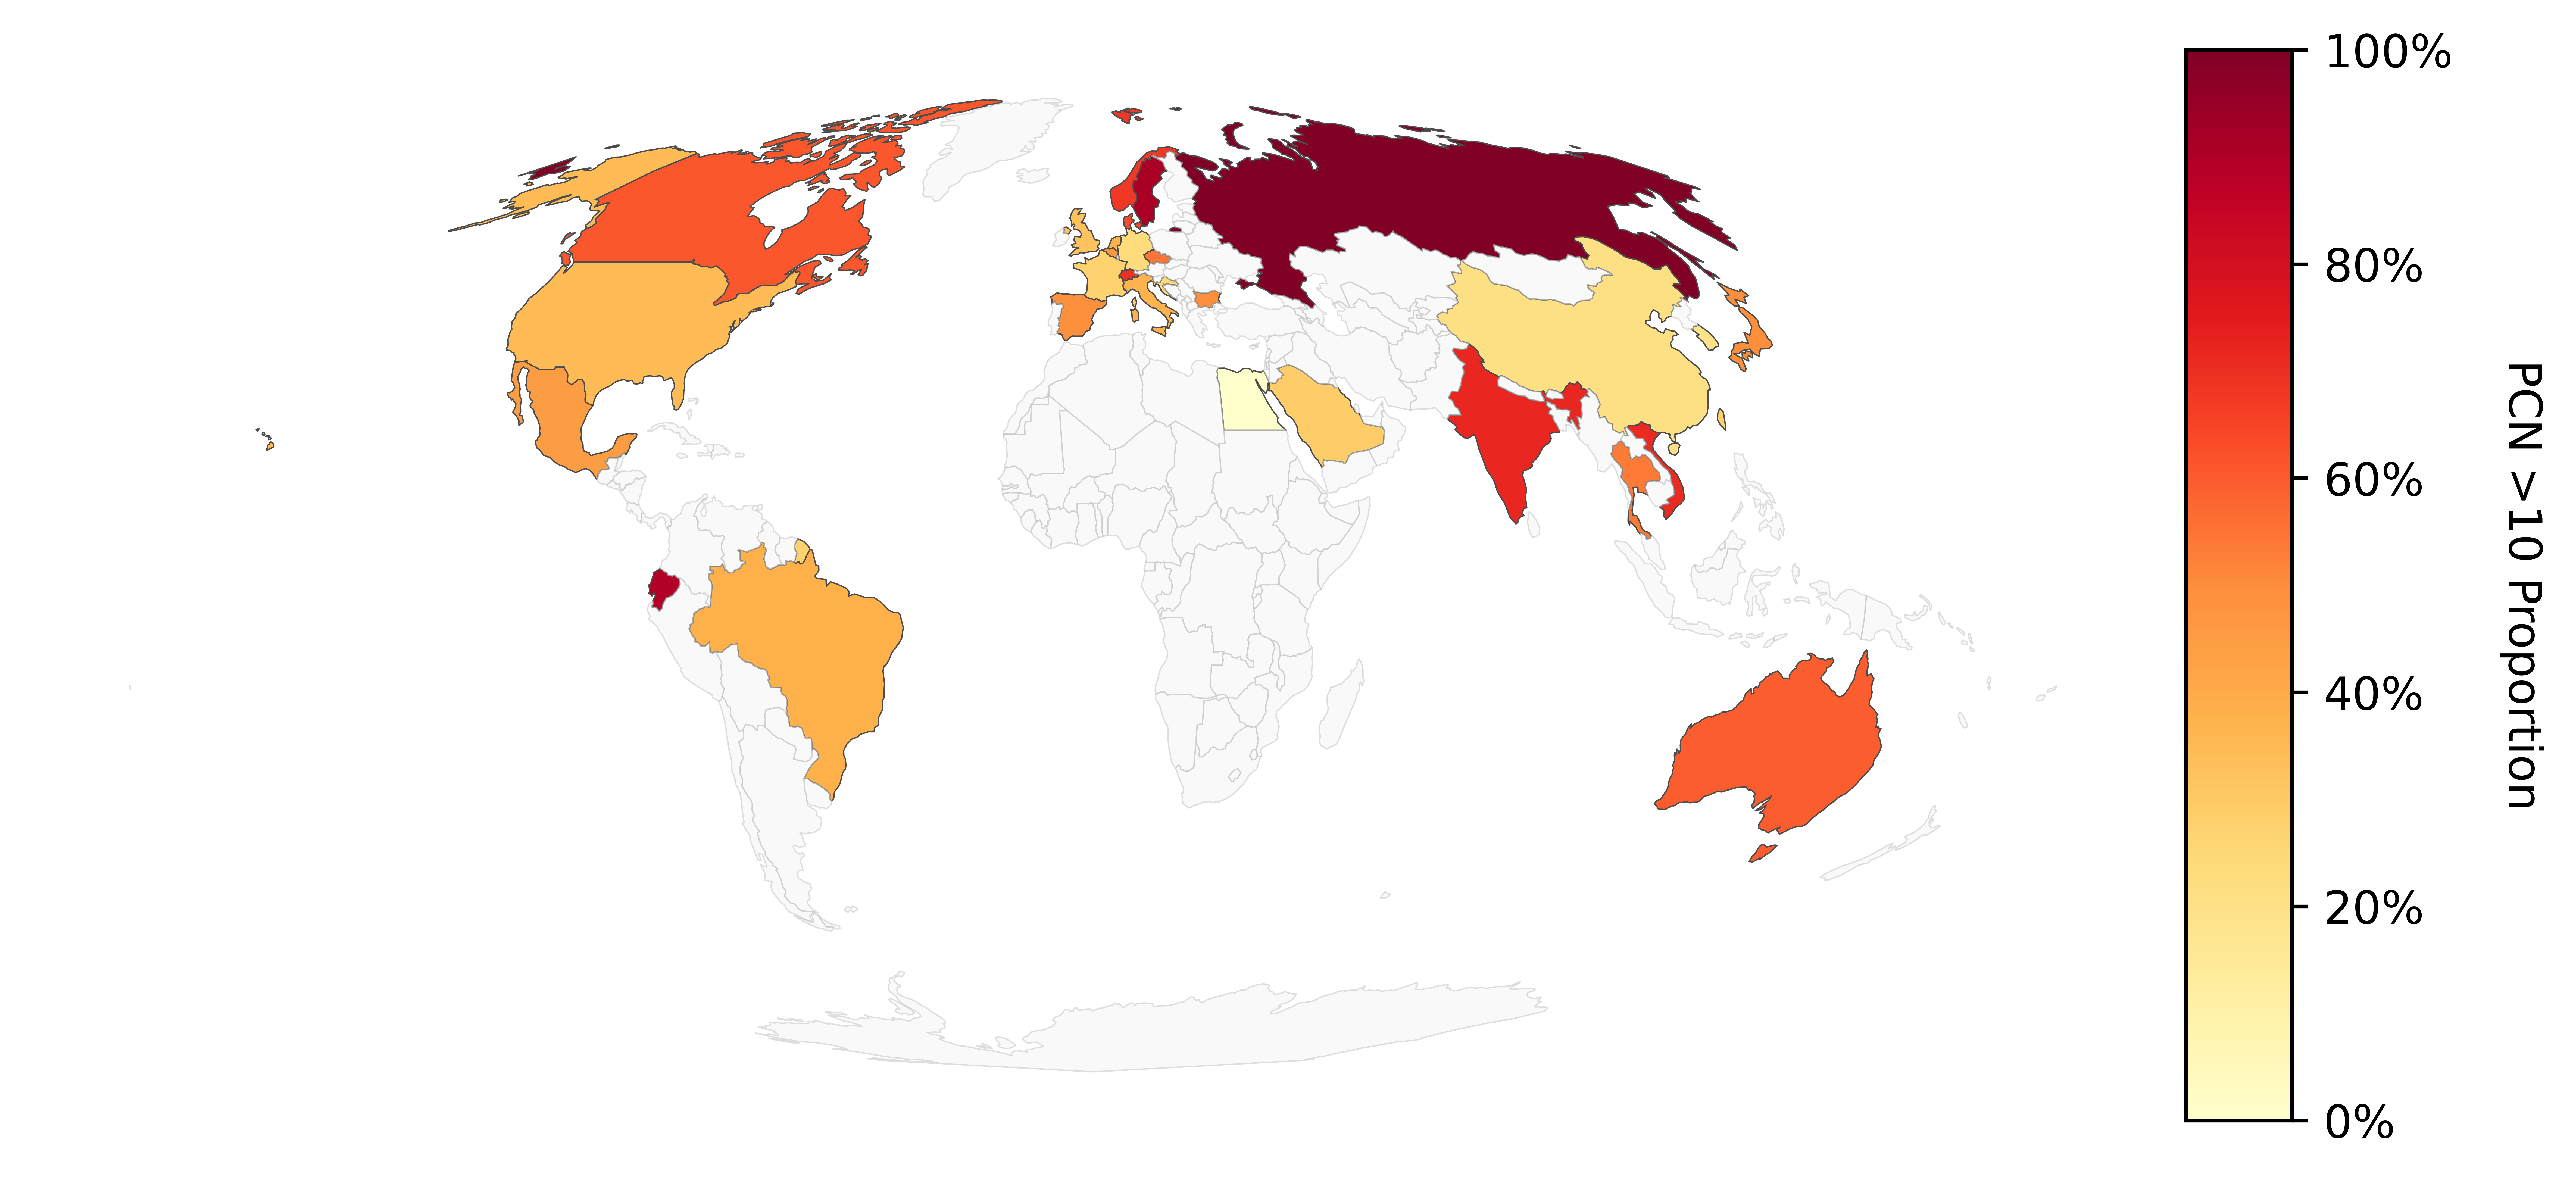

In [ ]:

# CONFIGURATION

DATA_PATH = "country_pcn_summary.xlsx" 
SHAPEFILE = "ne_110m_admin_0_countries.shp"


MIN_PLASMIDS = 100          # Minimum plasmids threshold
DPI = 1200                  # High-resolution output
FIG_SIZE = (8, 8)          # Compact figure size

# DATA PROCESSING

def load_and_prepare_data():
    """Load and process the data"""
    df = pd.read_excel(DATA_PATH)  
    
    # Calculate proportions
    df['High_PCN_Proportion'] = np.where(
        df['Total_Plasmids'] > 0,
        df['PCN_Greater_Than_10'] / df['Total_Plasmids'],
        np.nan
    )
    
    # Filter the data with minimum plasmids threshold
    filtered_df = df[df['Total_Plasmids'] >= MIN_PLASMIDS]
    print(f"\nCountries being plotted: {len(filtered_df)}")
    print("Sample of countries being visualized:")
    print(filtered_df[['Country', 'High_PCN_Proportion', 'Total_Plasmids']].head())
    
    return filtered_df

# VISUALIZATION

def create_pcn_map(data):
    """Create PCN proportion map with custom gradient"""
    # Prepare geographic data
    world = gpd.read_file(SHAPEFILE).to_crs("ESRI:54009")
    
    # Merge world map with data
    geo = world.merge(data, how='left', left_on='ADMIN', right_on='Country')
    
    # Initialize figure
    fig, ax = plt.subplots(figsize=FIG_SIZE, dpi=DPI)
    
    # Plot with yellow-to-red colormap
    geo.plot(
        column='High_PCN_Proportion',
        cmap='YlOrRd',  
        linewidth=0.3,
        edgecolor='0.3',  
        legend=False,
        ax=ax,
        missing_kwds={
    'color': 'whitesmoke', 
    'edgecolor': 'silver',  
    'hatch': None,          
    'alpha': 0.5            
}
    )
    
    # Add colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=0, vmax=1))
    sm._A = []
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label('PCN >10 Proportion', rotation=270, labelpad=20)
    cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    

    
    # Remove axis
    ax.set_axis_off()
    
    # Tight layout
    plt.tight_layout()
    
    return fig
import os  # <-- Add this at the top with other imports

# MAIN EXECUTION

if __name__ == "__main__":
    print("Generating PCN proportion map with yellow-to-red gradient...")
    
    try:
        # Load and prepare the data
        data = load_and_prepare_data()
        
        # Create the PCN map
        fig = create_pcn_map(data)
        
        # Save in multiple formats in current working directory
        output_dir = os.getcwd()  # get current working directory dynamically
        output_base = os.path.join(output_dir, "Figure_4A")  

        formats = ['pdf', 'svg', 'tiff']

        for fmt in formats:
            output_path = f"{output_base}.{fmt}"
            fig.savefig(output_path, dpi=DPI, bbox_inches='tight')
            print(f"Saved: {output_path}")
        
        # Display the plot
        plt.show()
        
    except Exception as e:
        print(f"Error: {str(e)}")
    finally:
        plt.close()

